<CENTER><img src="opendata-top-transblack.png" style="width:60%"></CENTER>

<CENTER><h1>Simple CVS to ROOT C++ notebook example</h1></CENTER>

In [1]:
//This line can give you an error into the VM, don't worry, it will not impact in your analysis
//%jsroot on

In [2]:
#include "Riostream.h"
#include "TString.h"
#include "TFile.h"
#include "TTree.h"
#include "TSystem.h"
#include <stdio.h>
#include <stdlib.h>

In [3]:
//This two lines can be commented out. You just need it once, and in case the CVS file was not provided already
//system("rm outreach.csv");
//system("wget http://opendata.atlas.cern/visualisations/CrossFilter/outreach.csv");

//If the file is downloaded with the line above, you *need* to remove the first line of the outreach.csv

In [4]:
TString dir = gSystem->UnixPathName(__FILE__);
dir.ReplaceAll("outreach.C","");
dir.ReplaceAll("/./","/");

TFile *f = new TFile("outreach.root","RECREATE");

In [5]:
TTree *tree = new TTree("ntuple","data from csv file");
// The file inside has ---->   type,  Channel,  NJets,  MET,  Mll,  LepDeltaPhi,  METLLDeltaPhi,  SumLepPt,  BTags,  weight
tree->ReadFile("outreach.csv","type/I:Channel/I:NJets/I:MET/F:Mll/F:LepDeltaPhi/F:METLLDeltaPhi/F:SumLepPt/F:BTags/F:weight/F",',');
f->Write();

In [6]:
system("ls -lhrt outreach.*");

-rw-r--r-- 1 summerstudent users 8.4M Jun  4 20:24 outreach.csv
-rw-r--r-- 1 summerstudent users 3.0M Jun  4 20:32 outreach.root


In [7]:
TFile *_file0 = TFile::Open("outreach.root");

In [8]:
TCanvas *cz = new TCanvas("cz","cz",10,10,400,400);
ntuple->Draw("BTags:weight","weight>-999","colz");

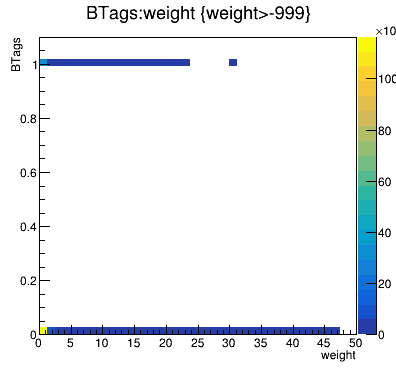

In [9]:
cz->Draw();

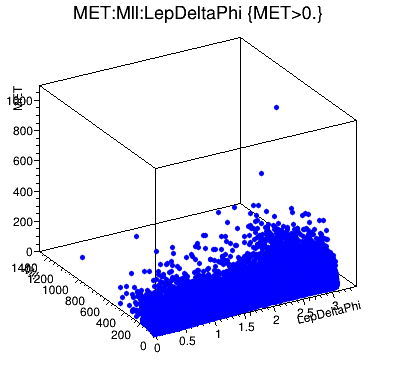

In [10]:
TCanvas *c3D = new TCanvas("c3D","c3D",10,10,400,400);
ntuple->Draw("MET:Mll:LepDeltaPhi","MET>0.");
c3D->Draw();

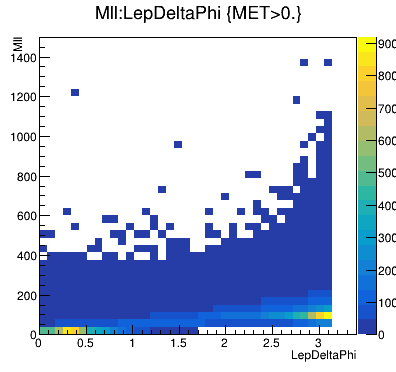

In [11]:
TCanvas *c2D = new TCanvas("c2D","c2D",10,10,400,400);
ntuple->Draw("Mll:LepDeltaPhi","MET>0.","colz");
c2D->Draw();

Below we can try to create a more complex analysis, following what is done in <b>notebook_micro_HEP_analysis_cpp_example.ipynb</b>

In [12]:
//TChain *Input = new TChain("ntuple");
//Input->Add("outreach.csv");

/*
int type =-1;
int Channel =-1;
int NJets =-1;
float MET =-1.;
float Mll =-1.;
float LepDeltaPhi =-999.;
float METLLDeltaPhi =-999.;
float SumLepPt =-999.;
float BTags =-999.;
float weight =-999.;
*/